In [1]:
import os
import numpy as np
import pandas as pd
from sabr_val.utils import to_year_fraction, to_strike_shift, term_tenor_conversion
from sabr_val.ircurves.ircurve import irCurve
from sabr_val.models.sabr import irSabrVolCube, sabr_normal
import matplotlib.pyplot as plt


In [2]:
dir =  'G:\\Dev\\sabr_val\\' #os.getcwd()

pathe_irvol_file = dir + '\\src\\data\\usd_irvols.csv'
path_ircuve_file = dir + '\\src\\data\\usd_ircurve.csv'

df = pd.read_csv(path_ircuve_file,sep ='\t', index_col =0)

df.index = df.index.map(to_year_fraction)
df.rename(columns={df.columns[0]: "rate"}, inplace = True)
# assumption instruments below 1Y maturity are deposit rates with a single payemnt
df['swap_freq'] = 2
df.loc[df.index<1.0,'swap_freq'] = 1

df_vol = pd.read_csv(pathe_irvol_file,sep ='\t', index_col =0, header =0)
df_vol['Term'], df_vol['Tenor'] = term_tenor_conversion(df_vol.index.to_list())
df_vol.set_index(['Term','Tenor'], inplace=True)

cols = df_vol.columns.to_list()
new_cols = [ to_strike_shift(c) for c in cols]
df_vol.rename(columns = dict(zip(cols, new_cols)), inplace = True)

In [3]:
# construct ir curve
ir_crv = irCurve(df)
# construct ir volcube
ir_volcube = irSabrVolCube(ir_vols = df_vol, ir_curve = ir_crv, shift = 0.0, beta = 0.0)

C:\Users\valZWork2\anaconda3\lib\site-packages\sabr_val\ircurves\ircurve.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.yc_curve.zc_bond.iloc[i] = df_n
C:\Users\valZWork2\anaconda3\lib\site-packages\sabr_val\ircurves\ircurve.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.yc_curve.zc_bond.iloc[i] = df_n
C:\Users\valZWork2\anaconda3\lib\site-packages\sabr_val\ircurves\ircurve.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

Calibration was succesful for term 0.5, tenor 1.0 average bp difference 0.692145952911641
model vols vs market vols [189.64593879875906, 155.52049483802307, 138.3553902369032, 130.05283283617376, 122.23999999999998, 115.31617451719576, 109.82334363309747, 104.99532707898368, 115.55980334026177] [188.65, 155.94, 138.83, 130.36, 122.24, 114.9, 108.98, 103.9, 116.42]
Calibration was succesful for term 0.5, tenor 5.0 average bp difference 0.43178657769144885
model vols vs market vols [154.2894237753919, 138.43764778486363, 133.95674118779496, 133.04587080290895, 133.14, 134.24406195603783, 136.28922185440487, 142.69033494427376, 161.00317590722855] [153.74, 139.04, 134.42, 133.3, 133.14, 134.0, 135.87, 142.22, 161.53]
Calibration was succesful for term 0.5, tenor 10.0 average bp difference 0.4411201317042733
model vols vs market vols [134.636882997676, 122.37765848923613, 121.52631248999228, 122.92581335664357, 125.50999999999999, 129.12065942841, 133.5492721986502, 144.06504110403998, 168

In [4]:
 ir_volcube.ir_vols

-0.02   -0.01  -0.005  -0.0025     0.0  0.0025   0.005    0.01  \
Term Tenor                                                                    
0.5  1.0    188.65  155.94  138.83   130.36  122.24  114.90  108.98  103.90   
     5.0    153.74  139.04  134.42   133.30  133.14  134.00  135.87  142.22   
     10.0   134.08  123.08  122.04   123.19  125.51  128.90  133.19  143.71   
     20.0   123.79  113.39  112.47   113.62  115.90  119.19  123.33  133.42   
1.0  1.0    172.99  155.68  147.64   144.00  140.74  137.99  135.84  133.74   
     5.0    145.75  136.57  134.12   133.69  133.87  134.67  136.10  140.67   
     10.0   122.75  119.01  119.95   121.26  123.14  125.54  128.41  135.28   
     20.0   113.82  108.87  109.51   110.81  112.77  115.32  118.40  125.77   
5.0  1.0    116.90  117.70  119.45   120.68  122.15  123.85  125.75  130.12   
     5.0    107.07  108.40  110.40   111.75  113.32  115.09  117.05  121.48   
     10.0    97.83   99.65  102.06   103.63  105.44  107.45  109.66  114.53   
     20.0    91.49   91.91   93.48    94.64   96.02   97.63   99.43  103.55   
10.0 1.0     93.55   93.93   95.14    96.02   97.09   98.32   99.72  102.95   
     5.0     86.59   87.25   88.69    89.71   90.91   92.30   93.84   97.36   
     10.0    79.03   80.64   82.76    84.14   85.72   87.47   89.38   93.58   
     20.0    73.81   74.30   75.80    76.88   78.16   79.64   81.29   85.02   

              0.02  shift  beta     alpha       rho        nu  
Term Tenor                                                     
0.5  1.0    116.42    0.0   0.0  0.011978 -0.582556  1.002277  
     5.0    161.53    0.0   0.0  0.012980  0.059871  0.787841  
     10.0   168.66    0.0   0.0  0.012249  0.296141  0.825207  
     20.0   157.13    0.0   0.0  0.011343  0.306018  0.779552  
1.0  1.0    138.46    0.0   0.0  0.013695 -0.343908  0.635401  
     5.0    154.79    0.0   0.0  0.012981  0.084564  0.615852  
     10.0   151.94    0.0   0.0  0.012030  0.311211  0.575986  
     20.0   143.38    0.0   0.0  0.011005  0.320090  0.591687  
5.0  1.0    140.56    0.0   0.0  0.011657  0.339784  0.372714  
     5.0    131.83    0.0   0.0  0.010882  0.376757  0.354992  
     10.0   125.60    0.0   0.0  0.010150  0.426333  0.357882  
     20.0   113.26    0.0   0.0  0.009257  0.362460  0.333531  
10.0 1.0    110.80    0.0   0.0  0.009177  0.318203  0.286277  
     5.0    105.69    0.0   0.0  0.008612  0.356469  0.287267  
     10.0   103.05    0.0   0.0  0.008150  0.442348  0.296538  
     20.0    93.67    0.0   0.0  0.007434  0.389662  0.282544

IR VolCube calibration results market vs model bp vols

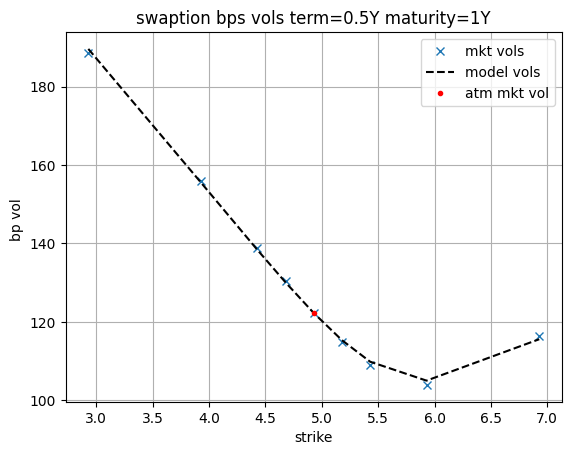

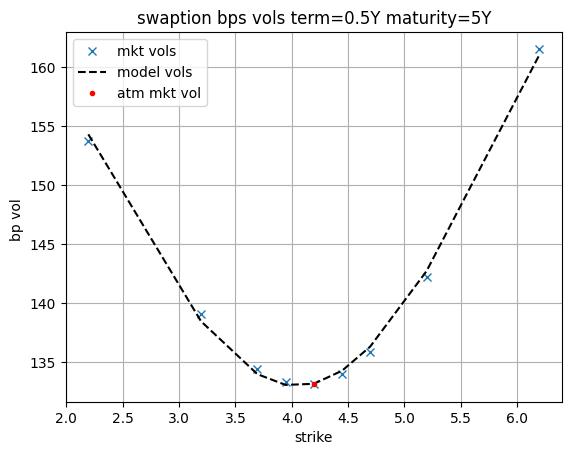

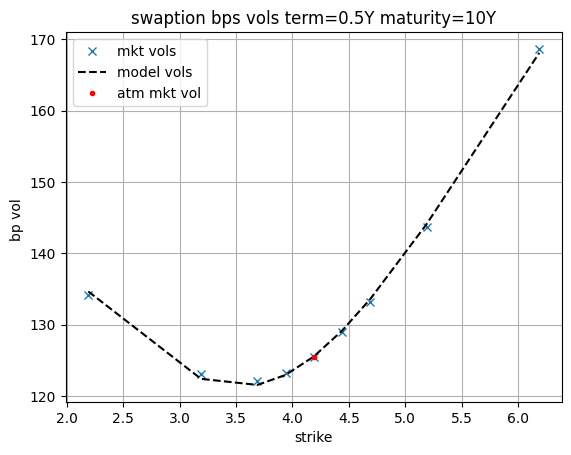

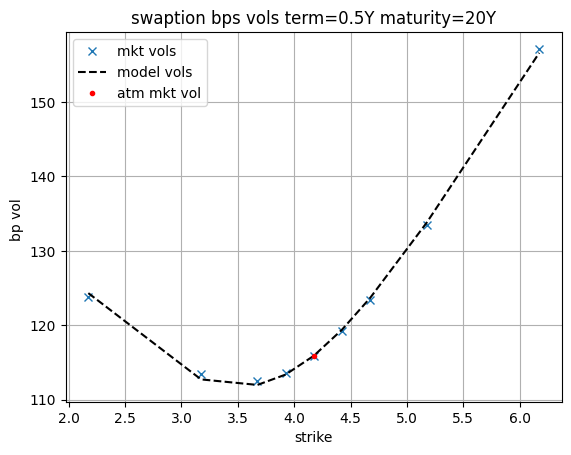

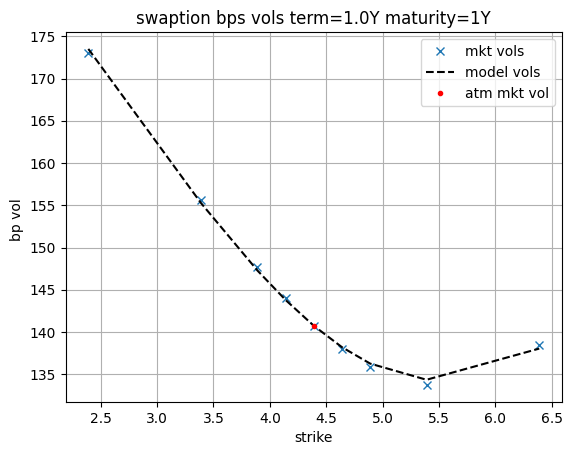

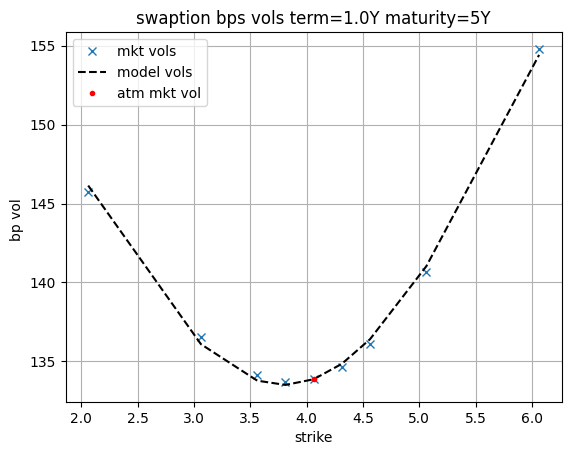

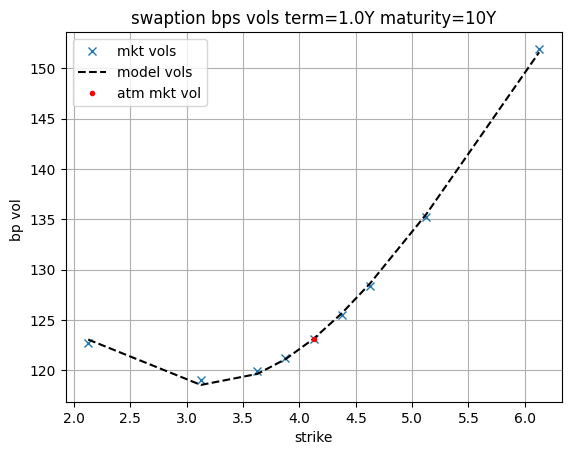

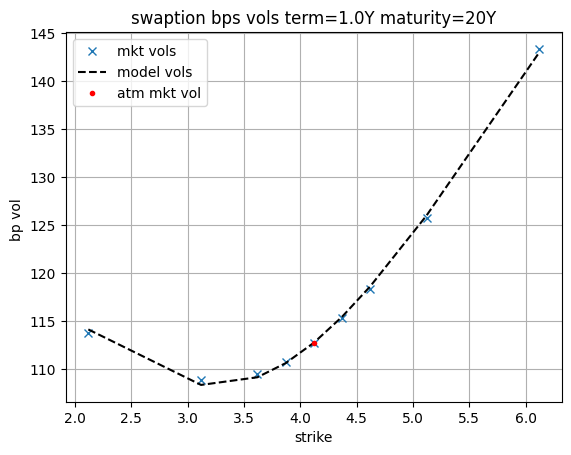

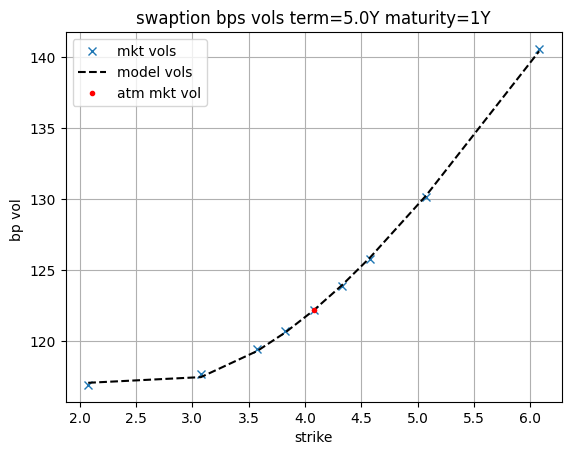

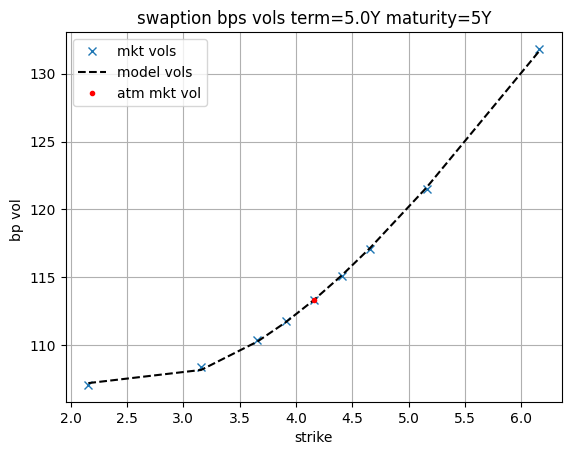

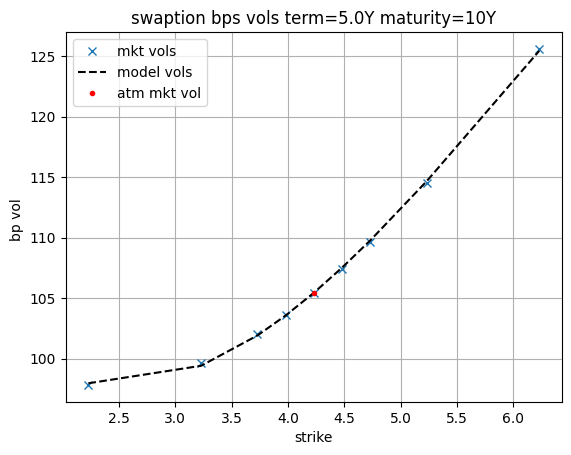

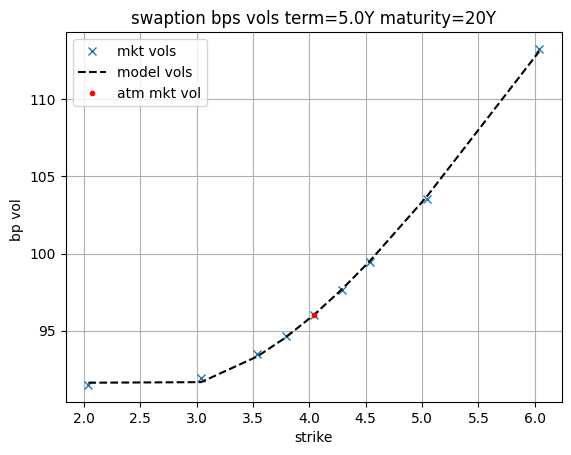

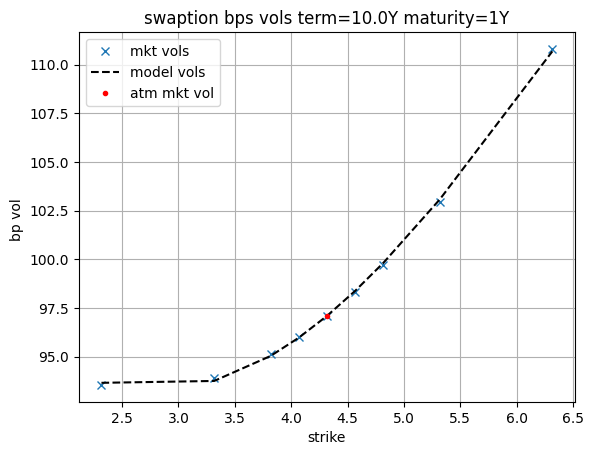

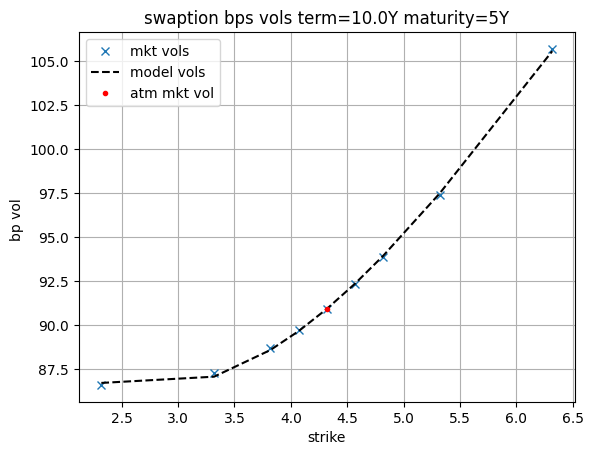

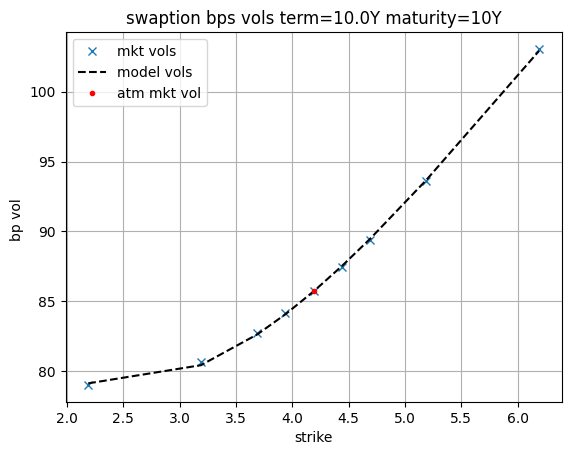

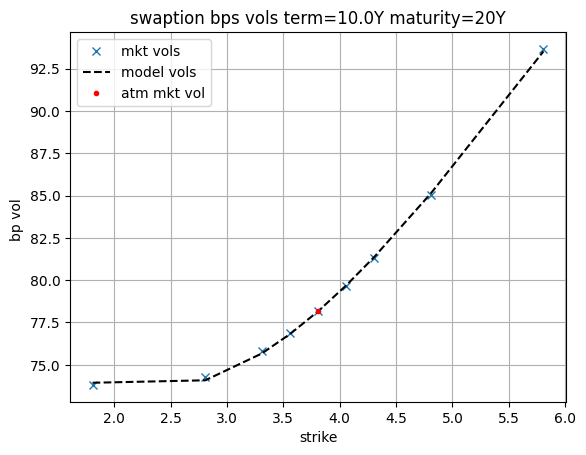

In [5]:
ir_vols = ir_volcube.ir_vols
for index, r in ir_vols.iterrows():
    term, tenor = index
    fwd = ir_volcube.ir_curve.swapRate(term, tenor)
    shift, beta = r['shift'], r['beta']
    mkt_vols = r.loc[ir_volcube.d_strikes].values
    mkt_vols = dict(zip(ir_volcube.d_strikes,mkt_vols))
    alpha, rho, nu = ir_vols.loc[index,['alpha','rho','nu']]
    normal = sabr_normal(Fwd = fwd, shift = shift, beta = beta, alpha = alpha, rho = rho, nu = nu)
    vols = [normal.vol(K = fwd+shift+dk, T = term) * 10000 for dk in mkt_vols.keys()]
    atm_vol = [mkt_vols[0.0]]
    strikes = [(fwd+dk) * 100 for dk in mkt_vols.keys()]
    
    plt.plot(strikes, list(mkt_vols.values()), 'x', label = f'mkt vols ')
    plt.plot(strikes, vols, 'k--', label = 'model vols')
    plt.plot([fwd*100], [atm_vol], 'r.', label = 'atm mkt vol')
    plt.grid(True)
    plt.legend()
    plt.xlabel('strike')
    plt.ylabel(f'bp vol ')
    plt.title(f'swaption bps vols term={term}Y maturity={int(tenor)}Y')
    plt.show()
    #plt.close
    

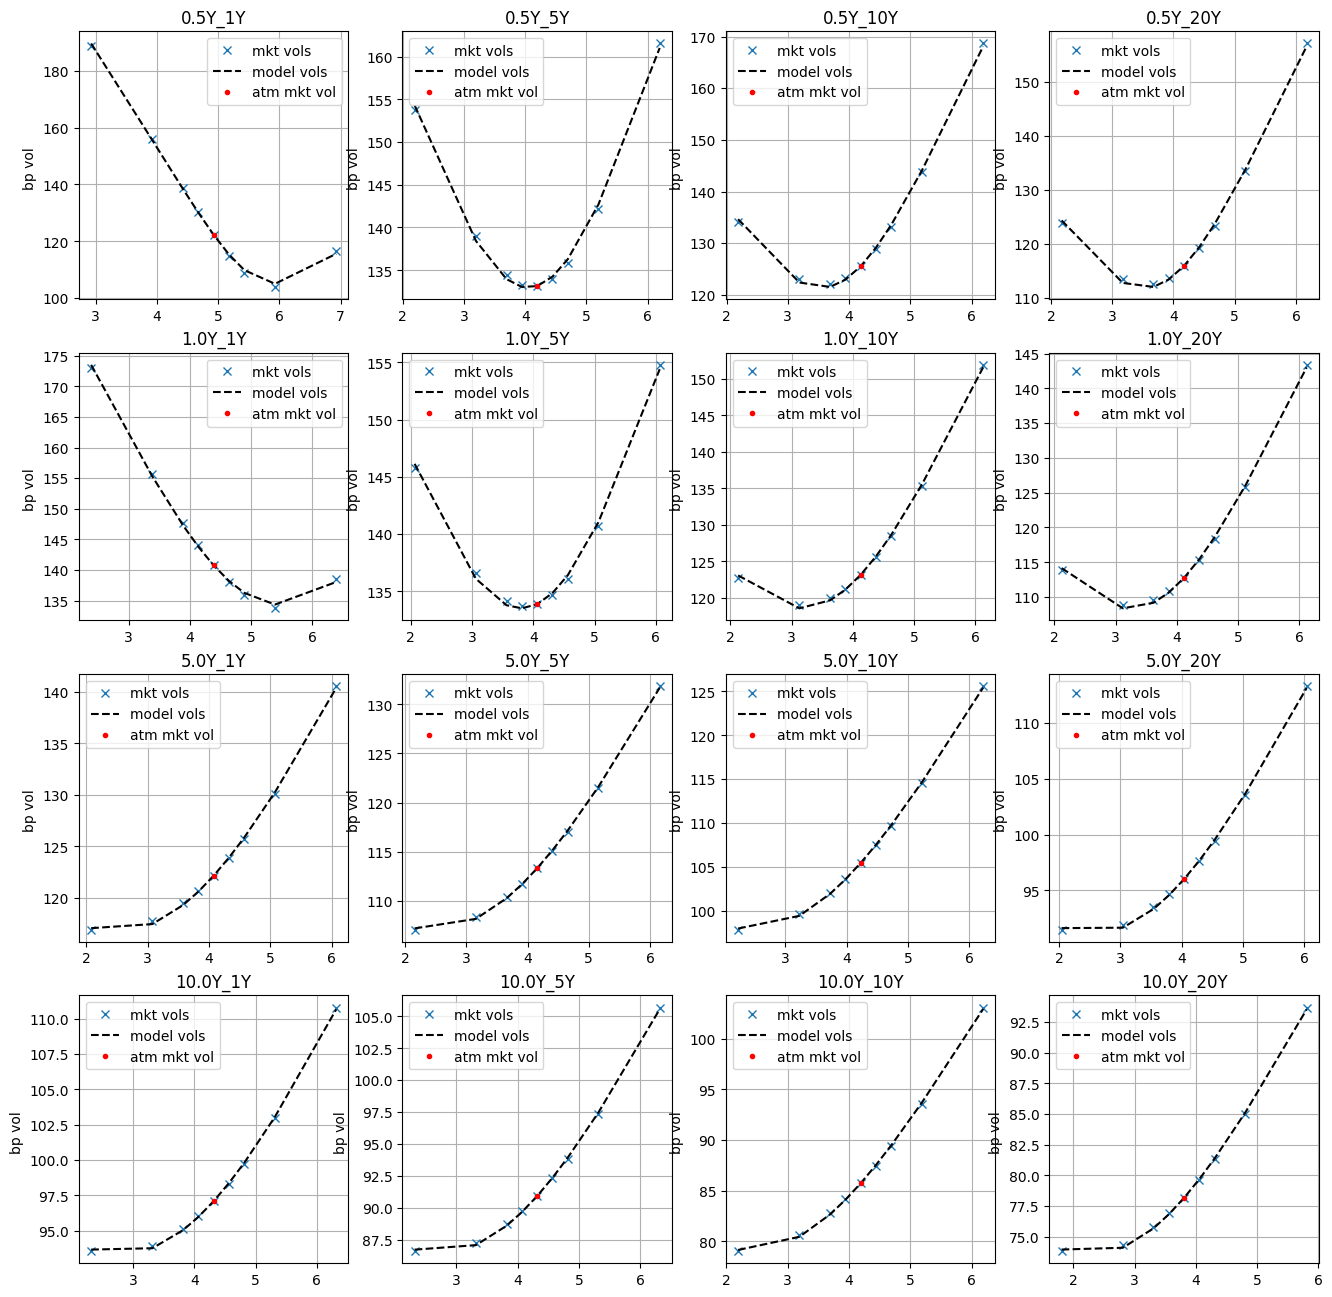

<Figure size 640x480 with 0 Axes>

In [9]:

ir_vols = ir_volcube.ir_vols

fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 4
i = 1
for index, r in ir_vols.iterrows():
    term, tenor = index
    fwd = ir_volcube.ir_curve.swapRate(term, tenor)
    shift, beta = r['shift'], r['beta']
    mkt_vols = r.loc[ir_volcube.d_strikes].values
    mkt_vols = dict(zip(ir_volcube.d_strikes,mkt_vols))
    alpha, rho, nu = ir_vols.loc[index,['alpha','rho','nu']]
    normal = sabr_normal(Fwd = fwd, shift = shift, beta = beta, alpha = alpha, rho = rho, nu = nu)
    vols = [normal.vol(K = fwd+shift+dk, T = term) * 10000 for dk in mkt_vols.keys()]
    atm_vol = [mkt_vols[0.0]]
    strikes = [(fwd+dk) * 100 for dk in mkt_vols.keys()]
    
    fig.add_subplot(rows, columns, i)
    plt.plot(strikes, list(mkt_vols.values()), 'x', label = f'mkt vols ')
    plt.plot(strikes, vols, 'k--', label = 'model vols')
    plt.plot([fwd*100], [atm_vol], 'r.', label = 'atm mkt vol')
    plt.grid(True)
    plt.legend()
    #plt.xlabel('strike')
    plt.ylabel(f'bp vol ')
    plt.title(f'{term}Y_{int(tenor)}Y')
    #plt.show()
    #figures = {'im'+str(i): np.random.randint(10, size=(h,w)) for i in range(number_of_im)}
    #plt.clf()
    i+=1

plt.show()
#plt.savefig(f'G:\\Dev\\sabr_val\\src\\doc\\charts\\swaption_bp_vols_term={term}Y_maturity={int(tenor)}Y.png')
plt.clf()


<Figure size 640x480 with 0 Axes>

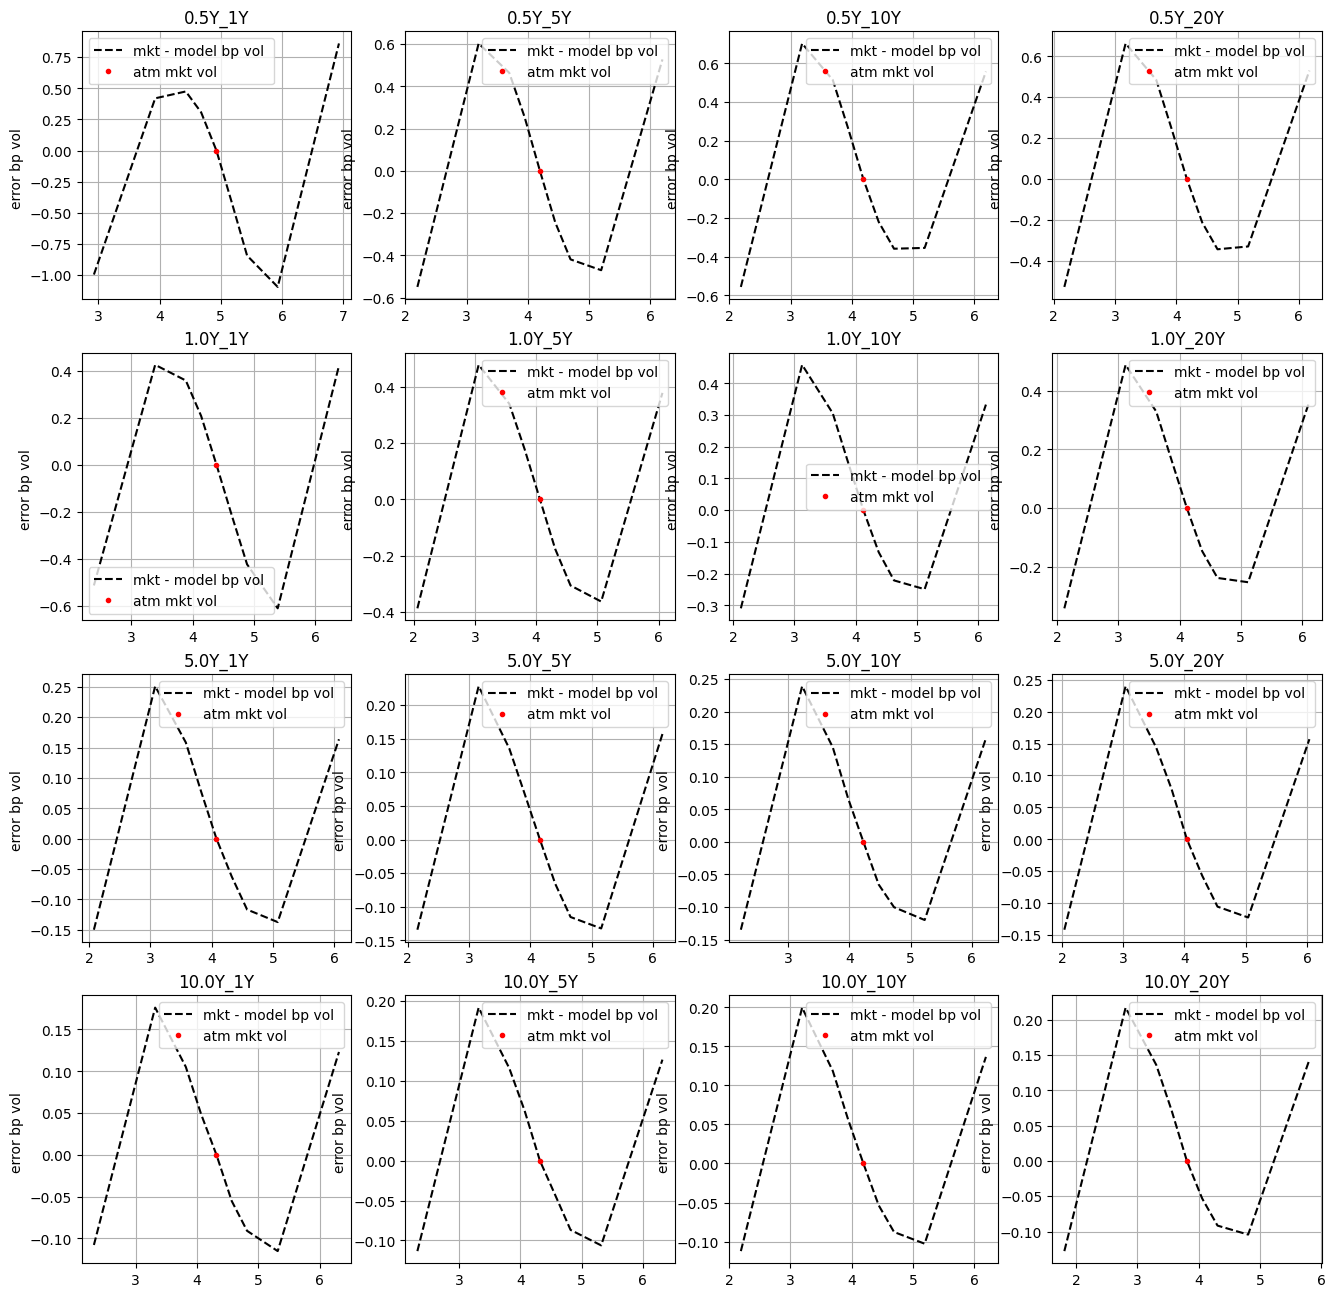

<Figure size 640x480 with 0 Axes>

In [12]:
plt.clf()
fig = plt.figure(figsize=(16, 16))
columns = 4
rows = 4
i = 1
for index, r in ir_vols.iterrows():
    term, tenor = index
    fwd = ir_volcube.ir_curve.swapRate(term, tenor)
    shift, beta = r['shift'], r['beta']
    mkt_vols = r.loc[ir_volcube.d_strikes].values
    mkt_vols = dict(zip(ir_volcube.d_strikes,mkt_vols))
    alpha, rho, nu = ir_vols.loc[index,['alpha','rho','nu']]
    normal = sabr_normal(Fwd = fwd, shift = shift, beta = beta, alpha = alpha, rho = rho, nu = nu)
    vols = [normal.vol(K = fwd+shift+dk, T = term) * 10000 for dk in mkt_vols.keys()]
    strikes = [(fwd+dk) * 100 for dk in mkt_vols.keys()]
    
    fig.add_subplot(rows, columns, i)
    plt.plot(strikes, np.array(list(mkt_vols.values()))-vols, 'k--', label = f'mkt - model bp vol ')
    plt.plot([fwd*100], [0.0], 'r.', label = 'atm mkt vol')
    plt.grid(True)
    plt.legend()
    #plt.xlabel('strike')
    plt.ylabel(f'error bp vol ')
    plt.title(f'{term}Y_{int(tenor)}Y')
    #plt.show()
    #figures = {'im'+str(i): np.random.randint(10, size=(h,w)) for i in range(number_of_im)}
    #plt.clf()
    i+=1

plt.show()
#plt.savefig(f'G:\\Dev\\sabr_val\\src\\doc\\charts\\swaption_calibration_errors_bps.png')
plt.clf()

1) Price and risk of 10m  USD receiver swaption expiring in 2Y into 8Y swap  ATM+50bps
2) Price and risk of 10m USD payer Swaption 5Yr expiry into 5Y swap ATM -75bps

In [6]:
# swaptions price and risk
term = 2.0
tenor = 8.0
texp = term
fwd1 =ir_crv.swapRate(term,tenor)
Ntl1 = 10000000
dK1 = 50 /10000
strike = fwd1+dK1
pay_rec1 = False
pv01 = ir_crv.PV01(term,tenor)*Ntl1
params =  ir_volcube._interpolate_calibrated_params(term, tenor, fwd1)
vol = ir_volcube.get_volatility(texp,term,tenor,fwd1,strike, **{"vol_params": params})
print(f'term {int(term)}Y tenor {int(tenor)}Y')
print(f'forward {fwd1}, pvo1 {pv01}, vol {vol}, model params {params}')
spn1_risk = ir_volcube.swaption_price(texp,term, tenor,fwd=fwd1,strike = strike,pv01=pv01, pay_rec=pay_rec1)
print(f'swaption pv and risk {spn1_risk}')

term 2Y tenor 8Y
forward 0.040675488431897326, pvo1 61627518.87488194, vol 0.012062832440841118, model params {0.0: 116.01608519511421, 'shift': 0.0, 'beta': 0.0, 'alpha': 0.01113073066802696, 'rho': 0.26704001072958106, 'nu': 0.5331308494558572}
swaption pv and risk {'pv': 591375.686995451, 'delta': -33009822.308104366, 'delta_adj': 4908020.697111437, 'gamma': 1380596359.50509, 'vega': 34474361.79937822, 'vega_adj': 1166556.693087926, 'theta': -49401.107358538604, 'vanna': -572252149.8478274, 'volga': 237196426.5665971}


In [7]:
term = 5.0
tenor = 5.0
texp = term
fwd2 =ir_crv.swapRate(term,tenor)
Ntl2 = 10000000
dK2 = -75 /10000
strike = fwd2+dK2
pay_rec2 = True
pv01 = ir_crv.PV01(term,tenor)*Ntl2
params =  ir_volcube._interpolate_calibrated_params(term, tenor, fwd2)
vol = ir_volcube.get_volatility(texp,term,tenor,fwd2,strike, **{"vol_params": params})
print(f'term {int(term)}Y tenor {int(tenor)}Y')
print(f'forward {fwd2}, pvo1 {pv01}, vol {vol}, model params {params}')
spn2_risk = ir_volcube.swaption_price(texp, term, tenor,fwd=fwd2, strike = strike,pv01=pv01, pay_rec=pay_rec2)
print(f'swaption pv and risk {spn2_risk}')


term 5Y tenor 5Y
forward 0.04157307563774936, pvo1 36162208.43031286, vol 0.010908928504437455, model params {0.0: 113.32, 'shift': 0.0, 'beta': 0.0, 'alpha': 0.010882256849889733, 'rho': 0.3767574108956702, 'nu': 0.3549921584151135}
swaption pv and risk {'pv': 504022.63789427944, 'delta': 26692228.37336508, 'delta_adj': 4244361.711915611, 'gamma': 564118187.5620604, 'vega': 31734512.020041853, 'vega_adj': 964887.1392050715, 'theta': -1937.9043318289268, 'vanna': -387837027.7149074, 'volga': 266641926.07721227}


In [8]:
print('Terminated')

Terminated


In [25]:
-1937 /365.00

-5.306849315068493